In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

# Q1

Write a program for the SVD from scratch using eigen decomposition on the data matrix $X$. Use the top $k$ singular vectors to reconstruct the data matrix
$\hat{X}$. Plot the reconstruction error $||X − \hat{X}||$ for $k = 1,2, \dots$


In [2]:
df = pd.read_csv("../Assignment-1/train.csv", header=None)
X = df.to_numpy(dtype=np.float32)  # datamatrix
X.shape

(60000, 256)

In [3]:
class SVD:
    def __init__(self) -> None:
        pass

    def compute(self, M):
        self.S, self.Vt = np.linalg.eig(M.T @ M)  # change this to use power method
        # self.S, self.Vt = self.eigen(M.T @ M)
        self.Vt = self.Vt.T
        self.S = np.sqrt(self.S)

        ncol = np.argsort(self.S)[::-1]  # arranging in decending order
        self.S = self.S[ncol]
        self.Vt = self.Vt[:, ncol]

        S_inv = np.diag(1 / self.S)  # inverse of diagonal matrix
        self.U = M @ self.Vt.T @ S_inv

    def normalize(self, x):
        fac = abs(x).max()
        x_n = x / x.max()
        return fac, x_n

    def eigen(self, M, max_iter=50):
        A = M.copy()

        eigenvalues = []
        eigenvecs = []
        for j in range(A.shape[0]):
            x = np.ones((A.shape[0],))
            for i in range(max_iter):
                x = A @ x
                lambda_1, x = self.normalize(x)
            eigenvalues.append(lambda_1)
            eigenvecs.append(x)
            A = A - lambda_1 * np.outer(x, x)
        return eigenvalues, np.transpose(eigenvecs)

In [4]:
svd = SVD()
svd.compute(X)

In [5]:
svd.U.shape, svd.S.shape, svd.Vt.shape 

((60000, 256), (256,), (256, 256))

In [6]:
def rec_error(svd, k=256):
    rec = np.zeros((60_000, 256))
    err = []
    for i in tqdm(range(k)):
        outer_prod = np.outer(svd.U[:, i], svd.Vt[i, :])
        rec = rec + outer_prod*svd.S[i]
        err.append(np.linalg.norm(X - rec))
    return range(1, k+1), err

100%|██████████| 256/256 [00:14<00:00, 17.99it/s]


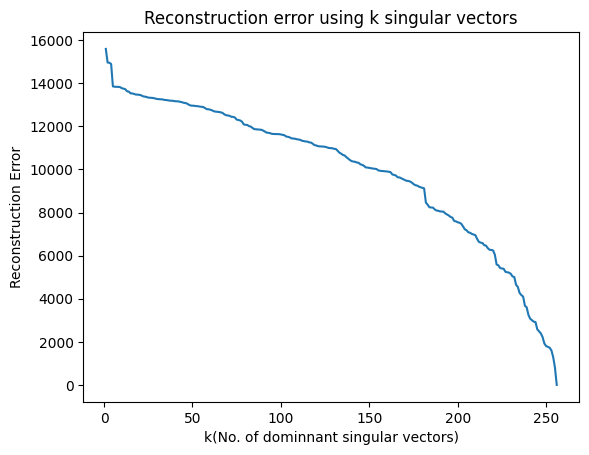

In [7]:
k, err = rec_error(svd, k=256)
plt.plot(k, err)
plt.title("Reconstruction error using k singular vectors")
plt.xlabel("k(No. of dominnant singular vectors)")
plt.ylabel("Reconstruction Error")
plt.show()

# Q2
1. Implement the 8 point algorithm for the image rectification display the two images before and after rectification.
2. Implement the Harris Corner Detection Algorithm plot the corners back to images and display.